In [1]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [67]:
'''
!pip install ipywidgets
!pip install IPython
!pip install graphviz
'''


import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )
  sns.set(rc={'figure.figsize':(8,8)})
  '''
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )
  '''

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


def sub_wise_splt(df,col,flage):
  total_count = len(set(df[col]))
  subjects=sorted(set(df[col]))

  train_axis = []
  test_axis = []

  count = 0

  if str(df[col].dtypes)=='object':
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == '"+i+"'"))
      else:
        test_axis.append(df.query(col+" == '"+i+"'"))
      count+=1
  else:
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == "+str(i)))
      else:
        test_axis.append(df.query(col+" == "+str(i)))
      count+=1


  return pd.concat(train_axis, axis=0).reset_index(drop = True),pd.concat(test_axis, axis=0).reset_index(drop = True)




from sklearn.preprocessing import LabelEncoder


def encode(data):
  cls = list(data)
  encoder=LabelEncoder()
  for i in cls:
    if str(data[i].dtypes) == 'object':
      data[i]=encoder.fit_transform(data[i])

  return data


def drop_str_col(data):
  cls = list(data)
  rmv=[]
  for i in cls:
    if str(data[i].dtypes) == 'object':
      rmv.append(i)
  data = data.drop(rmv, axis=1)
  return data




def items_check_box(items):
  new_keys=[]
  for i in items:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys
result={}


def viz_trees(model,fn,cn,upto):
  fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,8), dpi=900)
  for index in range(upto):
      tree.plot_tree(model.estimators_[index],
                    feature_names = fn,
                    class_names=cn,
                    filled = True,
                    ax = axes[index]);

      axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
  fig.savefig(str(model)+'.png')




def viz_single_tree(model,fn,cn,est):
  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,27), dpi=500)
  tree.plot_tree(model.estimators_[est],
                feature_names = fn,
                class_names=cn,
                filled = True);
  fig.savefig(str(model)+'.png')


!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

#***Dataset Read***

In [311]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
#dataset=pd.read_csv("C:/Users/MADE Lab/Desktop/Anaconda/Fitbit/Fitabase_DataMerge_LessRaw_12.15.2023_nanReplaced_rev6.csv")
#dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Feature Matrix/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")
#dataset=pd.read_excel("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.29_SPO2_wo_missing column.xlsx")
#dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Data Merge (Regression, HR_Recovery, pyHRV)/Fitabase_DataMerge_LessRaw_09.30.2023_nanReplaced.csv")
#dataset=pd.read_csv("C:/Users/Richard/Desktop/Fitbit/Fitabase_DataMerge_LessRaw_09.30.2023_nanReplaced.csv")
dataset = pd.read_csv('/home/iqh4001/Iqram_WCM/MADE Lab/Wearable Project/Data/Fitbit Results Data/Final Feature Matrix/Fitabase_DataMerge_LessRaw_12.15.2023_nanReplaced_rev10.csv')

In [251]:
dataset.head(10)

,Subject_ID,Condition,HR_MAX(BPM),aEE_MAX(J/min),Status_aEEmax,slope_HR/Calories,Intercept_HR/Calories,1_min_HR_Recovery,2_min_HR_Recovery,3_min_HR_Recovery,...,Unnamed: 352,Cumulative 30-Day POMS Score.1,Cumulative 5-Day POMS Score.1,Pre-Op HAQ-DI section sum:.1,Post-Op HAQ-DI section sum total:.1,Unnamed: 357.1,Pre-Op DASI - VO2 peak score:.1,Pre-Op DASI score in METS:.1,Post-Op DASI - VO2 peak score:.1,Post-Op DASI Score in METS.1
0,001-JV,pre,149,68.22,Low Risk,1.319097,59.013030,3.894737,10.751880,13.789474,...,NaN,0,NaN,5,5.0,NaN,22.60,6.45,27.96,7.98
1,001-JV,post,149,63.90,Low Risk,1.445584,56.622563,3.570175,10.175439,13.131579,...,NaN,0,NaN,5,5.0,NaN,22.60,6.45,27.96,7.98
2,002-JR,pre,137,63.81,Low Risk,1.146421,63.844702,6.425926,18.185185,22.981481,...,NaN,0,NaN,0,4.0,NaN,34.63,9.90,23.45,6.70
3,002-JR,post,145,58.01,Immediate Risk,1.358319,66.200422,4.010000,9.550000,13.400000,...,NaN,0,NaN,0,4.0,NaN,34.63,9.90,23.45,6.70
4,003-ES,pre,130,34.42,High Risk,2.083209,58.302814,3.269231,9.153846,13.923077,...,NaN,0,NaN,2,5.0,NaN,24.52,7.00,24.52,7.00
5,003-ES,post,130,32.01,High Risk,2.403864,53.053092,4.098485,10.719697,14.553030,...,NaN,0,NaN,2,5.0,NaN,24.52,7.00,24.52,7.00
6,004-LY,pre,165,51.24,Immediate Risk,2.026975,61.141661,3.779661,9.033898,12.644068,...,NaN,0,NaN,0,1.0,NaN,34.63,9.90,13.88,3.97
7,004-LY,post,154,77.38,Low Risk,1.038602,73.637312,3.748031,9.811024,13.181102,...,NaN,0,NaN,0,1.0,NaN,34.63,9.90,13.88,3.97
8,005-DF,pre,179,83.00,Low Risk,1.499019,54.588545,4.246377,10.594203,15.724638,...,NaN,0,NaN,0,0.0,NaN,34.63,9.90,34.63,9.90
9,005-DF,post,155,82.09,Low Risk,1.187825,57.488116,3.525114,9.474886,13.963470,...,NaN,0,NaN,0,0.0,NaN,34.63,9.90,34.63,9.90


**<font color='coral'>Adding VO2_Max_6MWT</font>**

In [252]:
list(dataset.columns)

['Subject_ID',
 'Condition',
 'HR_MAX(BPM)',
 'aEE_MAX(J/min)',
 'Status_aEEmax',
 'slope_HR/Calories',
 'Intercept_HR/Calories',
 '1_min_HR_Recovery',
 '2_min_HR_Recovery',
 '3_min_HR_Recovery',
 '4_min_HR_Recovery',
 '5_min_HR_Recovery',
 'nni_counter_Extreme',
 'nni_counter_Heavy',
 'nni_counter_Moderate',
 'nni_counter_Light',
 'nni_mean_Extreme',
 'nni_mean_Heavy',
 'nni_mean_Moderate',
 'nni_mean_Light',
 'nni_min_Extreme',
 'nni_min_Heavy',
 'nni_min_Moderate',
 'nni_min_Light',
 'nni_max_Extreme',
 'nni_max_Heavy',
 'nni_max_Moderate',
 'nni_max_Light',
 'hr_mean_Extreme',
 'hr_mean_Heavy',
 'hr_mean_Moderate',
 'hr_mean_Light',
 'hr_min_Extreme',
 'hr_min_Heavy',
 'hr_min_Moderate',
 'hr_min_Light',
 'hr_max_Extreme',
 'hr_max_Heavy',
 'hr_max_Moderate',
 'hr_max_Light',
 'hr_std_Extreme',
 'hr_std_Heavy',
 'hr_std_Moderate',
 'hr_std_Light',
 'nni_diff_mean_Extreme',
 'nni_diff_mean_Heavy',
 'nni_diff_mean_Moderate',
 'nni_diff_mean_Light',
 'nni_diff_min_Extreme',
 'nni_diff

#Split Dataset into pre and post

In [312]:
pre_dataset = dataset.query("Condition == 'pre'").reset_index(drop=True)
post_dataset = dataset.query("Condition == 'post'").reset_index(drop=True)


In [313]:
dataset = pre_dataset

#Custom Feature Selection

In [ ]:
"""
all_columns = list(dataset.columns)
new_keys=items_check_box(all_columns)
"""

In [13]:
"""
new_features = []
for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    new_features.append(all_columns[i])"""


In [315]:
new_features1 = [
'Subject_ID',
 'Condition',
 'HR_MAX(BPM)',
 'aEE_MAX(J/min)',
 'slope_HR/Calories',
 'Intercept_HR/Calories',
 '1_min_HR_Recovery',
 '2_min_HR_Recovery',
 '3_min_HR_Recovery',
 '4_min_HR_Recovery',
 '5_min_HR_Recovery',
 'hr_mean_Extreme',
 'hr_mean_Heavy',
 'hr_mean_Moderate',
 'hr_mean_Light',
 'hr_min_Extreme',
 'hr_min_Heavy',
 'hr_min_Moderate',
 'hr_min_Light',
 'hr_max_Extreme',
 'hr_max_Heavy',
 'hr_max_Moderate',
 'hr_max_Light',
 'hr_std_Extreme',
 'hr_std_Heavy',
 'hr_std_Moderate',
 'hr_std_Light',
 'sdnn_Extreme',
 'sdnn_Heavy',
 'sdnn_Moderate',
 'sdnn_Light',
 'rmssd_Extreme',
 'rmssd_Heavy',
 'rmssd_Moderate',
 'rmssd_Light',
 'sdsd_Extreme',
 'sdsd_Heavy',
 'sdsd_Moderate',
 'sdsd_Light',
 'nn50_Extreme',
 'nn50_Heavy',
 'nn50_Moderate',
 'nn50_Light',
 'pnn50_Extreme',
 'pnn50_Heavy',
 'pnn50_Moderate',
 'pnn50_Light',
 'nn20_Extreme',
 'nn20_Heavy',
 'nn20_Moderate',
 'nn20_Light',
 'pnn20_Extreme',
 'pnn20_Heavy',
 'pnn20_Moderate',
 'pnn20_Light',
 'fft_rel_vlf_Extreme',
 'fft_rel_vlf_Heavy',
 'fft_rel_vlf_Moderate',
 'fft_rel_vlf_Light',
 'fft_rel_lf_Extreme',
 'fft_rel_lf_Heavy',
 'fft_rel_lf_Moderate',
 'fft_rel_lf_Light',
 'fft_ratio_Extreme',
 'fft_ratio_Heavy',
 'fft_ratio_Moderate',
 'fft_ratio_Light',
 'fft_total_Extreme',
 'fft_total_Heavy',
 'fft_total_Moderate',
 'fft_total_Light',
 'sd1_Extreme',
 'sd1_Heavy',
 'sd1_Moderate',
 'sd1_Light',
 'sd2_Extreme',
 'sd2_Heavy',
 'sd2_Moderate',
 'sd2_Light',
 'sd_ratio_Extreme',
 'sd_ratio_Heavy',
 'sd_ratio_Moderate',
 'sd_ratio_Light',
 'ellipse_area_Extreme',
 'ellipse_area_Heavy',
 'ellipse_area_Moderate',
 'ellipse_area_Light',
 'sampen_Extreme',
 'sampen_Heavy',
 'sampen_Moderate',
 'sampen_Light',
 'dfa_alpha1_Extreme',
 'dfa_alpha1_Heavy',
 'dfa_alpha1_Moderate',
 'dfa_alpha1_Light',
 'dfa_alpha2_Extreme',
 'dfa_alpha2_Heavy',
 'dfa_alpha2_Moderate',
 'dfa_alpha2_Light',
 'Post-Op DASI Score in METS.1'
 ]

In [316]:
new_dataset = dataset.loc[:,new_features1]

## Feature Selection

In [317]:
"""['Cumulative 30-Day POMS Score.1',
 'Cumulative 5-Day POMS Score.1',
 'Pre-Op HAQ-DI section sum:.1',
 'Post-Op HAQ-DI section sum total:.1',
 'Unnamed: 357.1',
 'Pre-Op DASI - VO2 peak score:.1',
 'Pre-Op DASI score in METS:.1',
 'Post-Op DASI - VO2 peak score:.1',
 'Post-Op DASI Score in METS.1']"""

"['Cumulative 30-Day POMS Score.1',\n 'Cumulative 5-Day POMS Score.1',\n 'Pre-Op HAQ-DI section sum:.1',\n 'Post-Op HAQ-DI section sum total:.1',\n 'Unnamed: 357.1',\n 'Pre-Op DASI - VO2 peak score:.1',\n 'Pre-Op DASI score in METS:.1',\n 'Post-Op DASI - VO2 peak score:.1',\n 'Post-Op DASI Score in METS.1']"

In [318]:
target = 'Post-Op DASI Score in METS.1'

In [319]:
X = new_dataset.loc[:, new_dataset.columns!=target]
X = X.drop(['Subject_ID', 'Condition'], axis=1)

y = new_dataset[target]


fn=X.columns
cn=list(set(y))

new_dataset[target].value_counts()

9.900000    4
9.000000    4
8.300000    3
7.400000    3
6.700000    3
5.600000    3
5.100000    3
4.300000    3
7.980000    2
6.432727    2
4.000000    2
6.800000    2
5.070000    2
4.600000    2
6.600000    2
8.000000    2
6.000000    1
9.200000    1
7.340000    1
8.340000    1
5.290000    1
3.970000    1
7.000000    1
3.300000    1
7.900000    1
5.800000    1
5.300000    1
7.440000    1
7.300000    1
8.900000    1
5.050000    1
4.100000    1
8.330000    1
Name: Post-Op DASI Score in METS.1, dtype: int64

In [320]:
number_of_feat=int(input("Number Of Best Features: "))

per_score = []
for i in range(number_of_feat):
  per_score.append(1/(i+1))

In [321]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']
lyst_filter=featureScores1.nlargest(number_of_feat,'Score')

lyst_filter["per_score"] = per_score
lyst_filter

,Specs,Score,per_score
79,sd_ratio_Moderate,5.135796,1.000000
78,sd_ratio_Heavy,3.566664,0.500000
26,sdnn_Heavy,3.091349,0.333333
74,sd2_Heavy,3.085720,0.250000
1,aEE_MAX(J/min),2.720964,0.200000
87,sampen_Moderate,2.405822,0.166667
59,fft_rel_lf_Moderate,2.381379,0.142857
82,ellipse_area_Heavy,2.122470,0.125000
75,sd2_Moderate,2.048210,0.111111
27,sdnn_Moderate,2.021982,0.100000


In [322]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X contains your feature matrix and y contains your target variable
model = RandomForestRegressor()  # Replace with your preferred model
model.fit(X, y)


dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']
lyst_tree=featureScores1.nlargest(number_of_feat,'Score')
lyst_tree["per_score"] = per_score

lyst_tree

,Specs,Score,per_score
7,4_min_HR_Recovery,0.120031,1.000000
0,HR_MAX(BPM),0.087994,0.500000
58,fft_rel_lf_Heavy,0.078380,0.333333
1,aEE_MAX(J/min),0.055857,0.250000
21,hr_std_Extreme,0.038928,0.200000
87,sampen_Moderate,0.027886,0.166667
86,sampen_Heavy,0.022404,0.142857
89,dfa_alpha1_Extreme,0.018123,0.125000
88,sampen_Light,0.017915,0.111111
29,rmssd_Extreme,0.017910,0.100000


In [323]:
feature_col = []
score_per = []


#df_feature= pd.concat([lyst_filter,lyst_Pearson, lyst_wrp, lyst_tree] , ignore_index=True)

df_feature= pd.concat([lyst_tree] , ignore_index=True)

for i in df_feature['Specs'].unique():
  feature_col.append(i)
  score_per.append((df_feature.query("Specs == '"+i+"'")["per_score"].sum()))

dfscores = pd.DataFrame(score_per)
dfcolumns = pd.DataFrame(feature_col)
featureScores_per = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_per.columns = ['Specs','Per_Score']

featureScores_per= featureScores_per.sort_values(by = 'Per_Score',ascending = False).reset_index()
featureScores_per

,index,Specs,Per_Score
0,0,4_min_HR_Recovery,1.000000
1,1,HR_MAX(BPM),0.500000
2,2,fft_rel_lf_Heavy,0.333333
3,3,aEE_MAX(J/min),0.250000
4,4,hr_std_Extreme,0.200000
5,5,sampen_Moderate,0.166667
6,6,sampen_Heavy,0.142857
7,7,dfa_alpha1_Extreme,0.125000
8,8,sampen_Light,0.111111
9,9,rmssd_Extreme,0.100000


In [324]:
final_list_feature = featureScores_per["Specs"][0:15].to_list()
final_list_feature

['4_min_HR_Recovery',
 'HR_MAX(BPM)',
 'fft_rel_lf_Heavy',
 'aEE_MAX(J/min)',
 'hr_std_Extreme',
 'sampen_Moderate',
 'sampen_Heavy',
 'dfa_alpha1_Extreme',
 'sampen_Light',
 'rmssd_Extreme',
 'sd1_Extreme',
 '5_min_HR_Recovery',
 'sdsd_Extreme',
 'fft_rel_vlf_Heavy',
 'dfa_alpha2_Extreme']

In [325]:
X_new = new_dataset.loc[:,final_list_feature]
y_new = new_dataset[target]

# ***Preprocessing ***

**<font color='coral'>Null Dropping</font>**

In [326]:
new_dataset = new_dataset.dropna(axis=1,how='all') #column elemination
new_dataset = new_dataset.reset_index(drop=True)

**<font color='coral'>Check Null data count per column</font>**

In [327]:
null_cols = new_dataset.columns[new_dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",new_dataset[i].isna().sum().sum())
print('Total null: ',new_dataset.isna().sum().sum())

Total null:  0


**<font color='coral'>Filtering: <font color='blue'>Replacing null with mean if possible. (condition on `Subject_ID, Condition, Activity`)</font>**

In [328]:
%%capture
null_cols = new_dataset.columns[new_dataset.isnull().any()].tolist()

for current_col in null_cols:

  print(current_col)
  null_index = list(np.where(new_dataset[current_col].isna())[0])

  sub_con_act = []



  for i in null_index:
    if (new_dataset["Subject_ID"][i],new_dataset["Condition"][i]) not in sub_con_act:
      sub_con_act.append((new_dataset["Subject_ID"][i],new_dataset["Condition"][i]))


  for j in sub_con_act:
    temp_df = new_dataset.query("Condition == '"+j[1]+"' and Subject_ID == '"+j[0]+"'")

    #calculating mean
    temp_mean = temp_df[current_col].mean()

    for i in list(temp_df.index):
      if str(new_dataset[current_col][i]) == 'nan':
        new_dataset[current_col][i] = temp_mean


**<font color='coral'>Check Null data count per column after replacing</font>**

In [329]:
null_cols = new_dataset.columns[new_dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",new_dataset[i].isna().sum().sum())
print('Total null: ',new_dataset.isna().sum().sum())

Total null:  0


**removing rest of the null value**

In [330]:
new_dataset.dropna(axis=0, how='any', inplace = True) #row elemination
new_dataset = new_dataset.reset_index(drop=True)

In [331]:
new_dataset = new_dataset.loc[:,final_list_feature+[target]]


In [332]:
new_dataset

,4_min_HR_Recovery,HR_MAX(BPM),fft_rel_lf_Heavy,aEE_MAX(J/min),hr_std_Extreme,sampen_Moderate,sampen_Heavy,dfa_alpha1_Extreme,sampen_Light,rmssd_Extreme,sd1_Extreme,5_min_HR_Recovery,sdsd_Extreme,fft_rel_vlf_Heavy,dfa_alpha2_Extreme,Post-Op DASI Score in METS.1
0,16.701754,149,62.700098,68.22,8.541539,0.719259,1.321756,1.623542,1.162490,16.954691,11.926545,15.500000,13.442175,20.310580,1.165060,7.980000
1,25.227273,137,48.680235,63.81,10.299674,1.122461,1.304070,1.620013,1.185058,11.932990,8.409773,31.200000,7.712613,16.436494,1.086420,6.700000
2,14.300000,130,51.056958,34.42,2.906762,0.947970,1.412994,1.201400,1.219203,6.809542,4.812257,17.600000,4.594352,18.487742,1.238830,7.000000
3,17.928571,165,37.682581,51.24,7.495316,2.367124,1.026463,1.556168,1.215905,9.761063,6.872095,20.666667,6.279003,14.803630,1.173268,3.970000
4,22.400000,179,54.471166,83.00,10.776067,1.399393,1.212552,1.604439,0.971652,13.188319,9.307535,27.666667,9.049063,16.468795,1.332214,9.900000
5,30.318182,168,37.682581,48.37,7.495316,1.035214,1.026463,1.556168,1.299795,9.761063,6.872095,48.142857,6.279003,14.803630,1.173268,5.290000
6,18.789474,142,56.757624,26.59,6.999093,1.125459,0.936928,1.483177,0.946357,8.454545,5.895579,20.222222,5.237570,22.160959,1.393882,6.000000
7,16.000000,153,49.443455,69.03,10.299674,1.271132,1.128463,1.620013,1.161275,11.932990,8.409773,18.789474,7.712613,14.575347,1.086420,6.700000
8,34.384615,169,48.680235,66.73,11.622449,1.270463,1.304070,1.578202,1.090220,11.248585,7.945780,57.666667,6.868404,16.436494,1.374364,7.980000
9,25.153846,152,44.569551,51.28,3.753872,1.268511,0.992195,1.463574,1.074932,3.818905,2.696761,28.000000,3.273016,12.843172,0.873026,7.400000


In [333]:
new_dataset.shape

(59, 16)

# New Selection Of Train And Test


In [335]:
import ipywidgets as widgets
from IPython.display import display
import math

df_sorted = new_dataset.sort_values(by=target, ascending=True)
min_range, max_range = math.floor(df_sorted[target].min()),math.ceil(df_sorted[target].max())


range_gap = 2

populate_range = []

"""for i in range(min_range,100000,range_gap):
  if i >= max_range:
    break
  populate_range.append((i,i+range_gap-1))
"""

for i in np.arange(min_range,100000,range_gap):
  if i >= max_range:
    break
  populate_range.append((i,i+range_gap-0.01))


text_inputs = []
for i in range(len(populate_range)):

    text_train = widgets.Text(value='', description='Train:')
    text_inputs.append(text_train)




for t_i in range(len(text_inputs)):
    temp_data=new_dataset[(new_dataset[target] >= populate_range[t_i][0]) & ( new_dataset[target] <= populate_range[t_i][1])]
    print("Range:",(populate_range[t_i]),"---- Total Row: ",temp_data.shape[0])
    display(text_inputs[t_i])
    print("__________________________________________________________________")
    print()

Range: (3, 4.99) ---- Total Row:  10


Text(value='', description='Train:')

__________________________________________________________________

Range: (5, 6.99) ---- Total Row:  22


Text(value='', description='Train:')

__________________________________________________________________

Range: (7, 8.99) ---- Total Row:  18


Text(value='', description='Train:')

__________________________________________________________________

Range: (9, 10.99) ---- Total Row:  9


Text(value='', description='Train:')

__________________________________________________________________



In [336]:
fin_comb = []
for t_i in range(len(text_inputs)):
    fin_comb.append(int(text_inputs[t_i].value))


data = {col: [] for col in list(new_dataset.loc[0:0,new_dataset.columns!=target].columns)}
X_train = pd.DataFrame(data)
X_test =  pd.DataFrame(data)

y_train = pd.DataFrame({target:[]})
y_test = pd.DataFrame({target:[]})



for i in range(len(populate_range)):
  temp = new_dataset[(new_dataset[target] >= populate_range[i][0]) & ( new_dataset[target] <= populate_range[i][1])]
  X_train  = pd.concat([X_train,temp.iloc[:fin_comb[i],temp.columns != target]], ignore_index=True)

  y_train  = pd.concat([y_train,temp.iloc[:fin_comb[i],temp.columns == target]], ignore_index=True)

  X_test  = pd.concat([X_test,temp.iloc[:temp.shape[0]-fin_comb[i],temp.columns != target]], ignore_index=True)
  y_test = pd.concat([y_test,temp.iloc[:temp.shape[0]-fin_comb[i],temp.columns == target]], ignore_index=True)
  print()
  


y_train =  y_train[target]
y_test = y_test[target]

In [337]:
X_train

,4_min_HR_Recovery,HR_MAX(BPM),fft_rel_lf_Heavy,aEE_MAX(J/min),hr_std_Extreme,sampen_Moderate,sampen_Heavy,dfa_alpha1_Extreme,sampen_Light,rmssd_Extreme,sd1_Extreme,5_min_HR_Recovery,sdsd_Extreme,fft_rel_vlf_Heavy,dfa_alpha2_Extreme
0,17.928571,165.0,37.682581,51.24,7.495316,2.367124,1.026463,1.556168,1.215905,9.761063,6.872095,20.666667,6.279003,14.803630,1.173268
1,16.812500,165.0,37.682581,48.12,5.866034,1.322919,1.026463,1.567753,1.253233,9.537223,6.695611,24.538462,5.625631,14.803630,1.504737
2,18.770833,153.0,38.181300,32.07,5.175159,0.586347,0.950179,1.622492,1.156738,6.612016,4.663637,21.857143,3.576958,7.603286,0.805791
3,17.483051,153.0,36.945225,35.35,7.458075,1.102933,0.800491,1.486190,1.120504,10.056052,7.104365,20.708333,5.893831,8.000635,1.067366
4,18.600000,177.0,46.464923,46.69,11.217776,1.125459,1.100845,1.721159,1.226446,9.549446,6.747581,23.500000,5.790046,13.227616,1.894609
5,14.000000,148.0,41.174011,65.22,10.299674,1.691193,1.619049,1.620013,1.272957,11.932990,8.409773,20.666667,7.712613,27.890755,1.086420
6,19.875000,167.0,37.682581,50.75,9.788476,1.132459,1.026463,1.654416,1.040973,9.012835,6.344017,26.833333,5.050266,14.803630,1.421684
7,15.900000,137.0,37.682581,48.76,6.032093,1.132459,1.026463,1.536865,1.046868,11.408126,8.014232,18.625000,6.732135,14.803630,0.848468
8,25.227273,137.0,48.680235,63.81,10.299674,1.122461,1.304070,1.620013,1.185058,11.932990,8.409773,31.200000,7.712613,16.436494,1.086420
9,30.318182,168.0,37.682581,48.37,7.495316,1.035214,1.026463,1.556168,1.299795,9.761063,6.872095,48.142857,6.279003,14.803630,1.173268


In [338]:
X_test

,4_min_HR_Recovery,HR_MAX(BPM),fft_rel_lf_Heavy,aEE_MAX(J/min),hr_std_Extreme,sampen_Moderate,sampen_Heavy,dfa_alpha1_Extreme,sampen_Light,rmssd_Extreme,sd1_Extreme,5_min_HR_Recovery,sdsd_Extreme,fft_rel_vlf_Heavy,dfa_alpha2_Extreme
0,17.928571,165.0,37.682581,51.24,7.495316,2.367124,1.026463,1.556168,1.215905,9.761063,6.872095,20.666667,6.279003,14.803630,1.173268
1,16.812500,165.0,37.682581,48.12,5.866034,1.322919,1.026463,1.567753,1.253233,9.537223,6.695611,24.538462,5.625631,14.803630,1.504737
2,25.227273,137.0,48.680235,63.81,10.299674,1.122461,1.304070,1.620013,1.185058,11.932990,8.409773,31.200000,7.712613,16.436494,1.086420
3,30.318182,168.0,37.682581,48.37,7.495316,1.035214,1.026463,1.556168,1.299795,9.761063,6.872095,48.142857,6.279003,14.803630,1.173268
4,18.789474,142.0,56.757624,26.59,6.999093,1.125459,0.936928,1.483177,0.946357,8.454545,5.895579,20.222222,5.237570,22.160959,1.393882
5,16.701754,149.0,62.700098,68.22,8.541539,0.719259,1.321756,1.623542,1.162490,16.954691,11.926545,15.500000,13.442175,20.310580,1.165060
6,14.300000,130.0,51.056958,34.42,2.906762,0.947970,1.412994,1.201400,1.219203,6.809542,4.812257,17.600000,4.594352,18.487742,1.238830
7,34.384615,169.0,48.680235,66.73,11.622449,1.270463,1.304070,1.578202,1.090220,11.248585,7.945780,57.666667,6.868404,16.436494,1.374364
8,22.400000,179.0,54.471166,83.00,10.776067,1.399393,1.212552,1.604439,0.971652,13.188319,9.307535,27.666667,9.049063,16.468795,1.332214
9,33.117647,175.0,48.680235,66.97,10.804338,1.504077,1.304070,1.570930,0.912282,13.003774,9.161683,35.571429,8.741917,16.436494,0.903713


In [339]:
y_test

0    3.97
1    3.30
2    6.70
3    5.29
4    6.00
5    7.98
6    7.00
7    7.98
8    9.90
9    9.90
Name: Post-Op DASI Score in METS.1, dtype: float64

In [340]:
y_train

0     3.970000
1     3.300000
2     4.000000
3     4.300000
4     4.600000
5     4.600000
6     4.000000
7     4.300000
8     6.700000
9     5.290000
10    6.000000
11    6.700000
12    5.600000
13    6.700000
14    6.600000
15    6.600000
16    5.100000
17    6.432727
18    5.600000
19    6.432727
20    5.300000
21    5.800000
22    5.600000
23    5.100000
24    5.070000
25    5.070000
26    5.050000
27    7.980000
28    7.000000
29    7.980000
30    7.400000
31    7.400000
32    8.340000
33    8.300000
34    8.300000
35    7.340000
36    7.900000
37    7.440000
38    8.000000
39    7.400000
40    8.300000
41    7.300000
42    9.900000
43    9.900000
44    9.000000
45    9.200000
46    9.000000
47    9.000000
48    9.900000
Name: Post-Op DASI Score in METS.1, dtype: float64

In [341]:
"""number_of_feat=int(input("Number Of Best Features: "))

per_score = []
for i in range(number_of_feat):
  per_score.append(1/(i+1))"""

'number_of_feat=int(input("Number Of Best Features: "))\n\nper_score = []\nfor i in range(number_of_feat):\n  per_score.append(1/(i+1))'

**Feature Selection: Filter Method**

In [342]:
"""from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']
lyst_filter=featureScores1.nlargest(number_of_feat,'Score')

lyst_filter["per_score"] = per_score
lyst_filter"""

'from sklearn.feature_selection import SelectKBest\nbestfeatures_1 = SelectKBest(k=10)\nfit = bestfeatures_1.fit(X,y)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X.columns)\nfeatureScores1 = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores1.columns = [\'Specs\',\'Score\']\nlyst_filter=featureScores1.nlargest(number_of_feat,\'Score\')\n\nlyst_filter["per_score"] = per_score\nlyst_filter'



---



---





---



---





---



#Models

In [343]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [344]:
"""
!pip install shap
"""


import shap

def explain_shap(model,temp_X,max_dis=20):
  explainer = shap.Explainer(model.predict, temp_X)
  shap_values = explainer (temp_X)
  shap.plots.bar(shap_values,max_display=max_dis)

In [345]:
"""X_train = X
y_train = y"""

'X_train = X\ny_train = y'

#Random Forest Regressor

In [346]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


count=[]
mx_depth=[]

for i in range(2,15):
  rfr = RandomForestRegressor(max_depth=i)

  rfr.fit(X_train, y_train)
  y_pred = rfr.predict(X_train)
  r2=r2_score(y_train,y_pred)
  print("RF Training r2: ",r2,", When Max Depth:",i)
  count.append(r2)
  mx_depth.append(i)

print("RF Max R2: ",max(count)," Max Depth: ",mx_depth[count.index(max(count))])

RF Training r2:  0.7054528490207499 , When Max Depth: 2
RF Training r2:  0.808901232987665 , When Max Depth: 3
RF Training r2:  0.8898208861986836 , When Max Depth: 4
RF Training r2:  0.8965535579871553 , When Max Depth: 5
RF Training r2:  0.9038553480645637 , When Max Depth: 6
RF Training r2:  0.91647427587678 , When Max Depth: 7
RF Training r2:  0.9161737142585029 , When Max Depth: 8
RF Training r2:  0.9179663683124065 , When Max Depth: 9
RF Training r2:  0.9154468293435161 , When Max Depth: 10
RF Training r2:  0.9020352830886499 , When Max Depth: 11
RF Training r2:  0.9076527562467334 , When Max Depth: 12
RF Training r2:  0.9091970662407465 , When Max Depth: 13
RF Training r2:  0.9209484990216206 , When Max Depth: 14
RF Max R2:  0.9209484990216206  Max Depth:  14


Training r2:  0.9209484990216206
R_sq:  0.9209484990216206


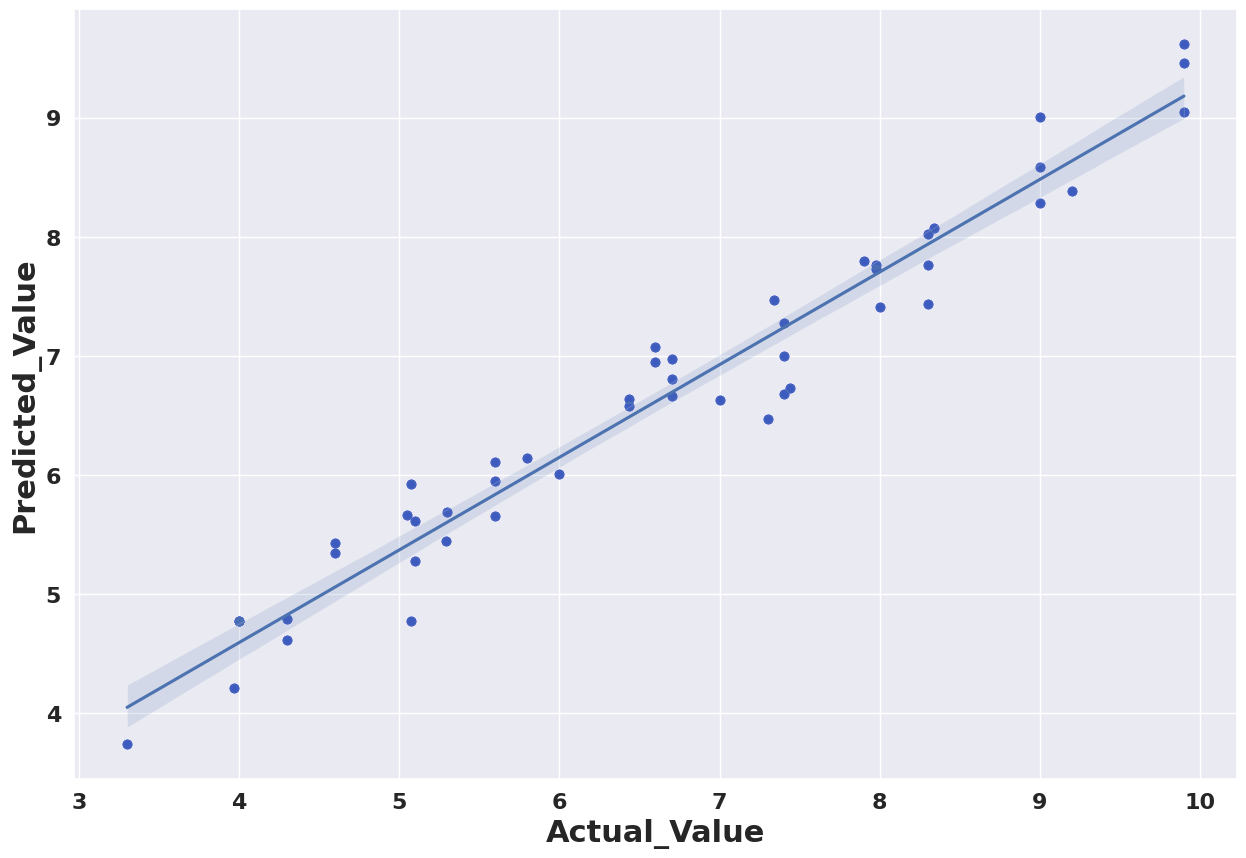

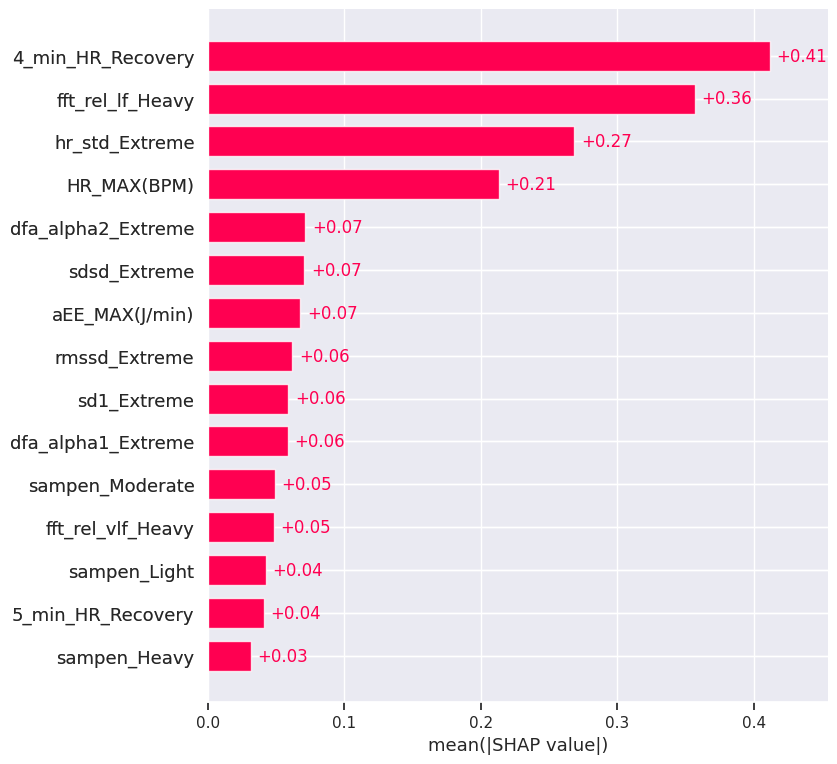

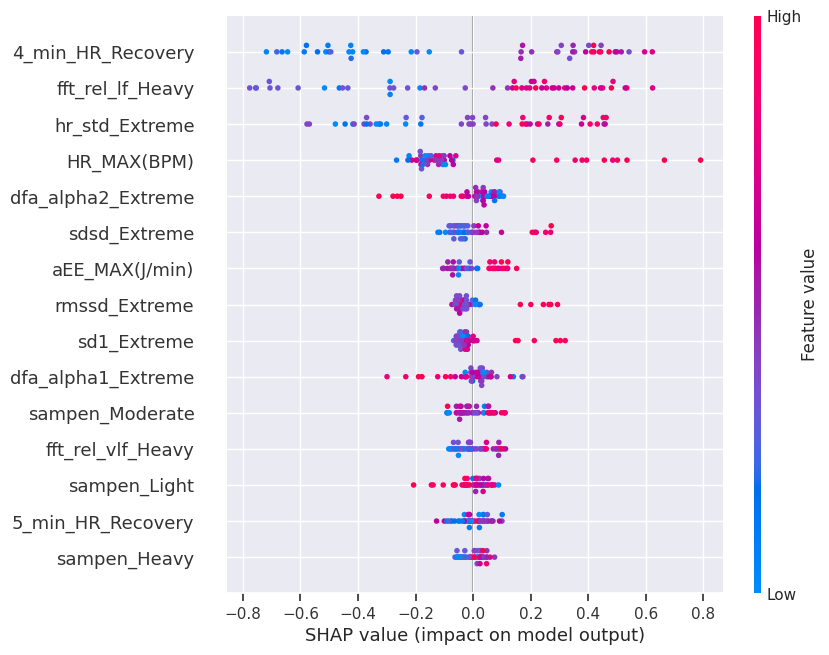

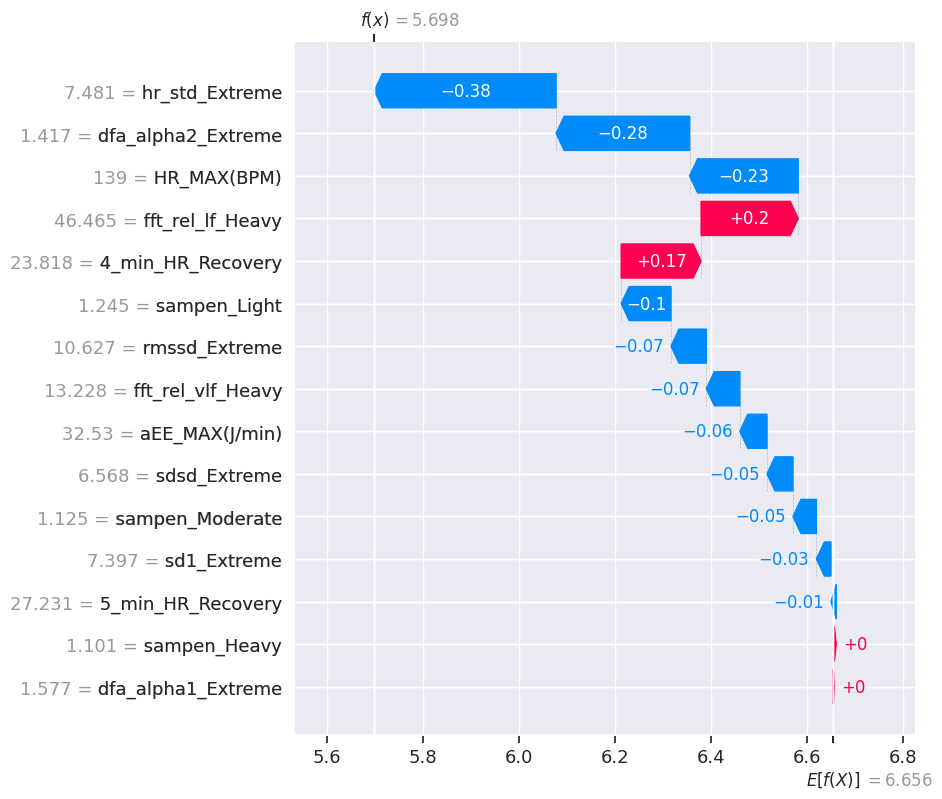

In [347]:
from sklearn.metrics import r2_score,mean_squared_error
print("Training r2: ",r2_score(y_train,y_pred))

r_sq = rfr.score(X_train, y_train)
print("R_sq: ",r_sq)


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
prim_plot(y_train,y_pred)
plt.show()

regr2 = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))])
regr2.fit(X_train, y_train)

explainer2 = shap.Explainer(regr2, X_train)
check_additivity=False
shap_values2 = explainer2 (X_train, check_additivity=check_additivity)
shap.plots.bar(shap_values2,max_display=50)
shap.plots.beeswarm(shap_values2, max_display=50)
shap.plots.waterfall(shap_values2[20], max_display=50)



In [348]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


count=[]
mx_depth=[]

for i in range(2,15):
  rfr = RandomForestRegressor(max_depth=i)

  rfr.fit(X_train, y_train)
  y_pred = rfr.predict(X_test)
  r2=r2_score(y_test,y_pred)
  print("RF Testing r2: ",r2,", When Max Depth:",i)
  count.append(r2)
  mx_depth.append(i)

print("RF Max R2: ",max(count)," Max Depth: ",mx_depth[count.index(max(count))])

RF Testing r2:  0.8101554966273309 , When Max Depth: 2
RF Testing r2:  0.925390416551526 , When Max Depth: 3
RF Testing r2:  0.9600195075590344 , When Max Depth: 4
RF Testing r2:  0.9661359032317136 , When Max Depth: 5
RF Testing r2:  0.9683357941125863 , When Max Depth: 6
RF Testing r2:  0.9717699670397713 , When Max Depth: 7
RF Testing r2:  0.9690665996002367 , When Max Depth: 8
RF Testing r2:  0.9747614797027367 , When Max Depth: 9
RF Testing r2:  0.9669347522368305 , When Max Depth: 10
RF Testing r2:  0.9743712856733258 , When Max Depth: 11
RF Testing r2:  0.977149547978498 , When Max Depth: 12
RF Testing r2:  0.9729296232718323 , When Max Depth: 13
RF Testing r2:  0.9794786253227661 , When Max Depth: 14
RF Max R2:  0.9794786253227661  Max Depth:  14


Testing r2:  0.9794786253227661
R_sq:  0.9794786253227661


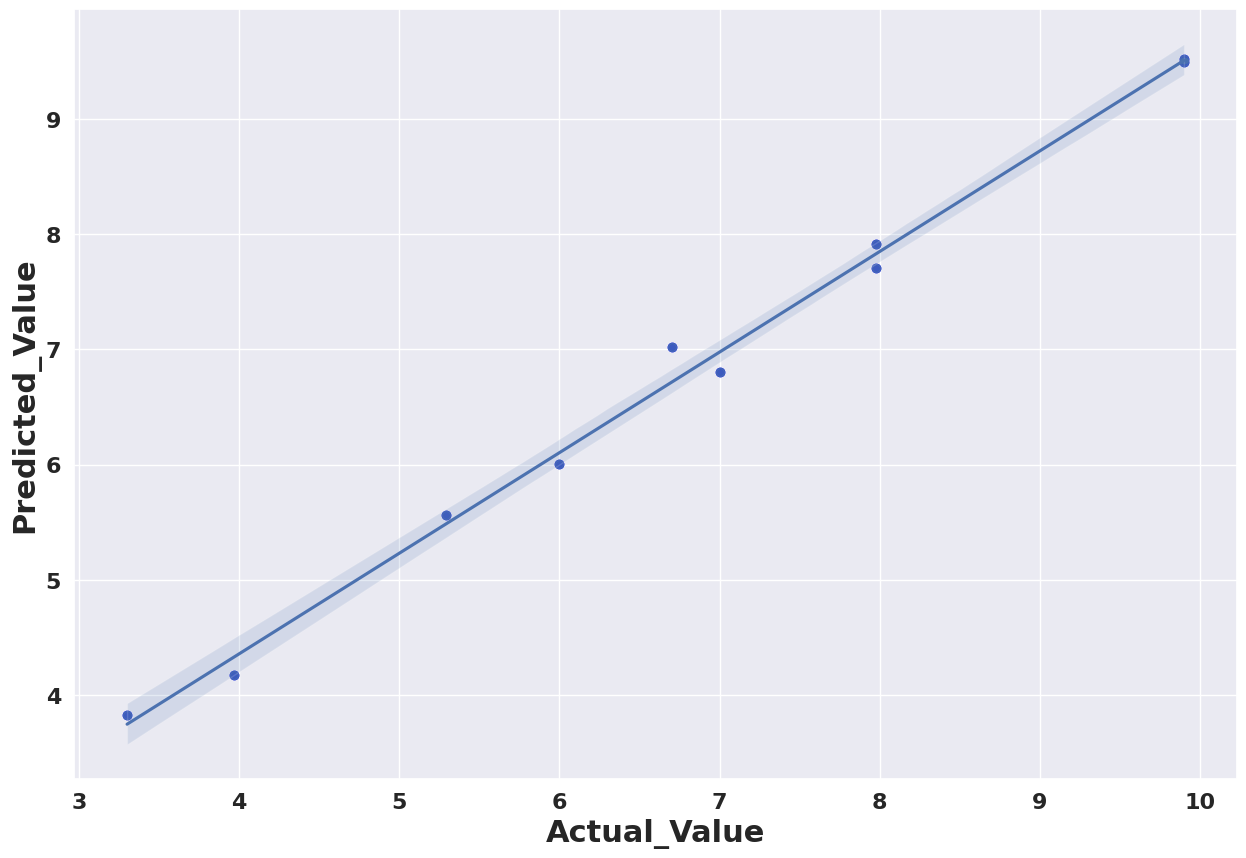

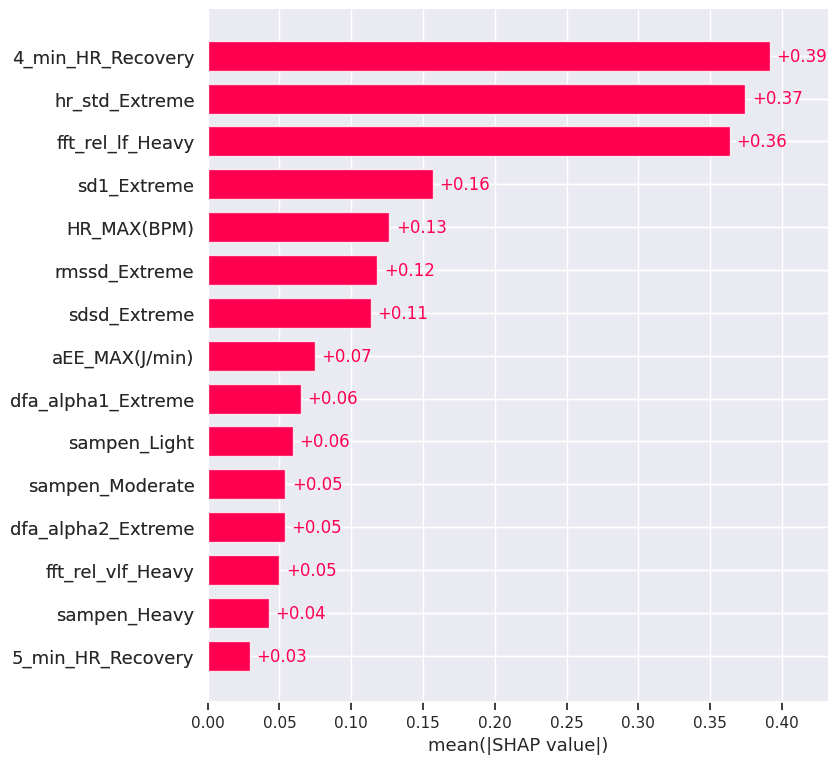

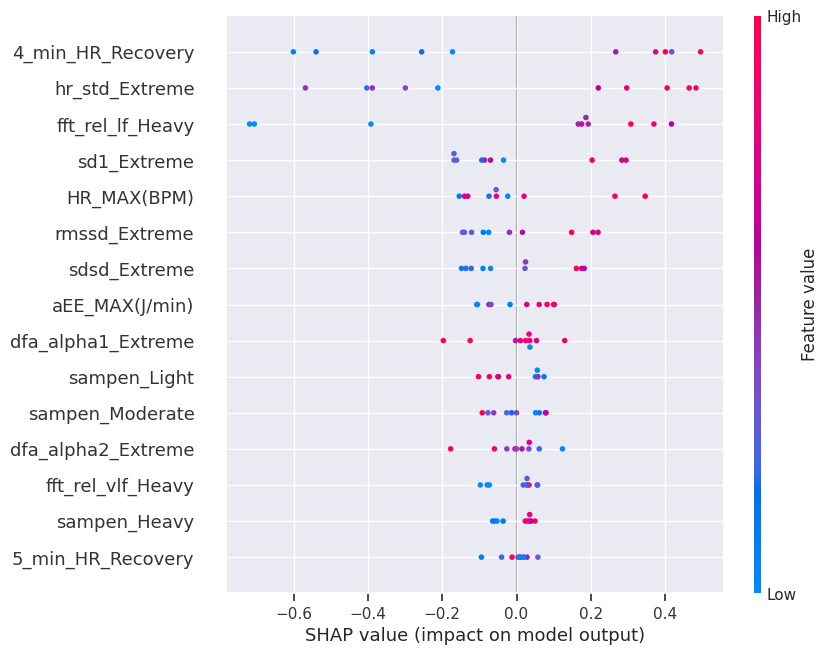

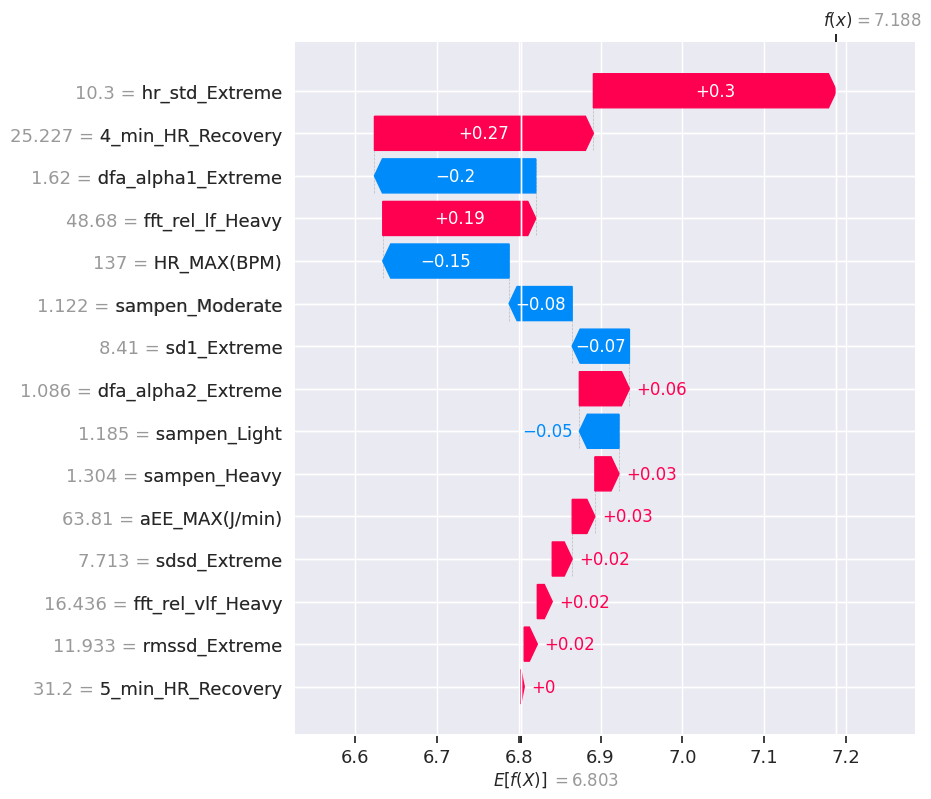

In [349]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred))

r_sq = rfr.score(X_test, y_test)
print("R_sq: ",r_sq)


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
prim_plot(y_test,y_pred)
plt.show()

regr2 = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))])
regr2.fit(X_train, y_train)

explainer2 = shap.Explainer(regr2, X_test)
check_additivity=False
shap_values2 = explainer2 (X_test, check_additivity=check_additivity)
shap.plots.bar(shap_values2,max_display=50)
shap.plots.beeswarm(shap_values2, max_display=50)
shap.plots.waterfall(shap_values2[2], max_display=50)



In [350]:
'''
viz_trees(rfr,fn,['0','1','2'],2)
'''

"\nviz_trees(rfr,fn,['0','1','2'],2)\n"

In [351]:
#pd.DataFrame(zip(X.columns, rfr.coef_))

In [352]:
pip install pyCompare


Note: you may need to restart the kernel to use updated packages.


In [353]:
#pyCompare.blandAltman(y_train,y_pred, limitOfAgreement=1.96, confidenceInterval=95, confidenceIntervalMethod='approximate', detrend=None, percentage=False, **kwargs)

In [354]:
#Linear Regression

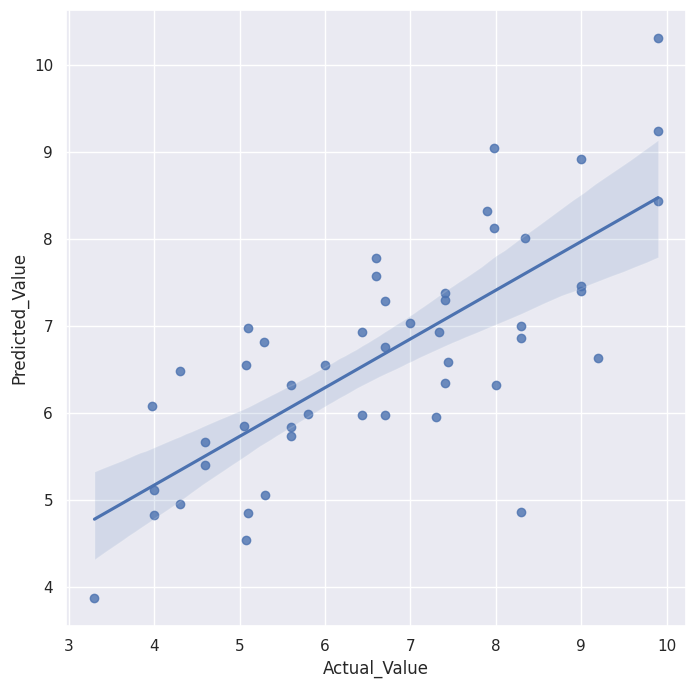

In [355]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)

prim_plot(y_train,y_pred)


In [356]:
#Feature Coefficient

In [357]:
pd.DataFrame(zip(X.columns, lin_reg.coef_))

,0,1
0,HR_MAX(BPM),0.178192
1,aEE_MAX(J/min),0.024203
2,slope_HR/Calories,0.080870
3,Intercept_HR/Calories,-0.018580
4,1_min_HR_Recovery,0.255309
5,2_min_HR_Recovery,0.088967
6,3_min_HR_Recovery,-0.714075
7,4_min_HR_Recovery,-6.676561
8,5_min_HR_Recovery,0.516742
9,hr_mean_Extreme,-10.414974


In [358]:
#Model Intercept

In [359]:
lin_reg.intercept_

7.50730528433686

Testing r2:  0.5600395126341711
R_sq:  0.5600395126341711


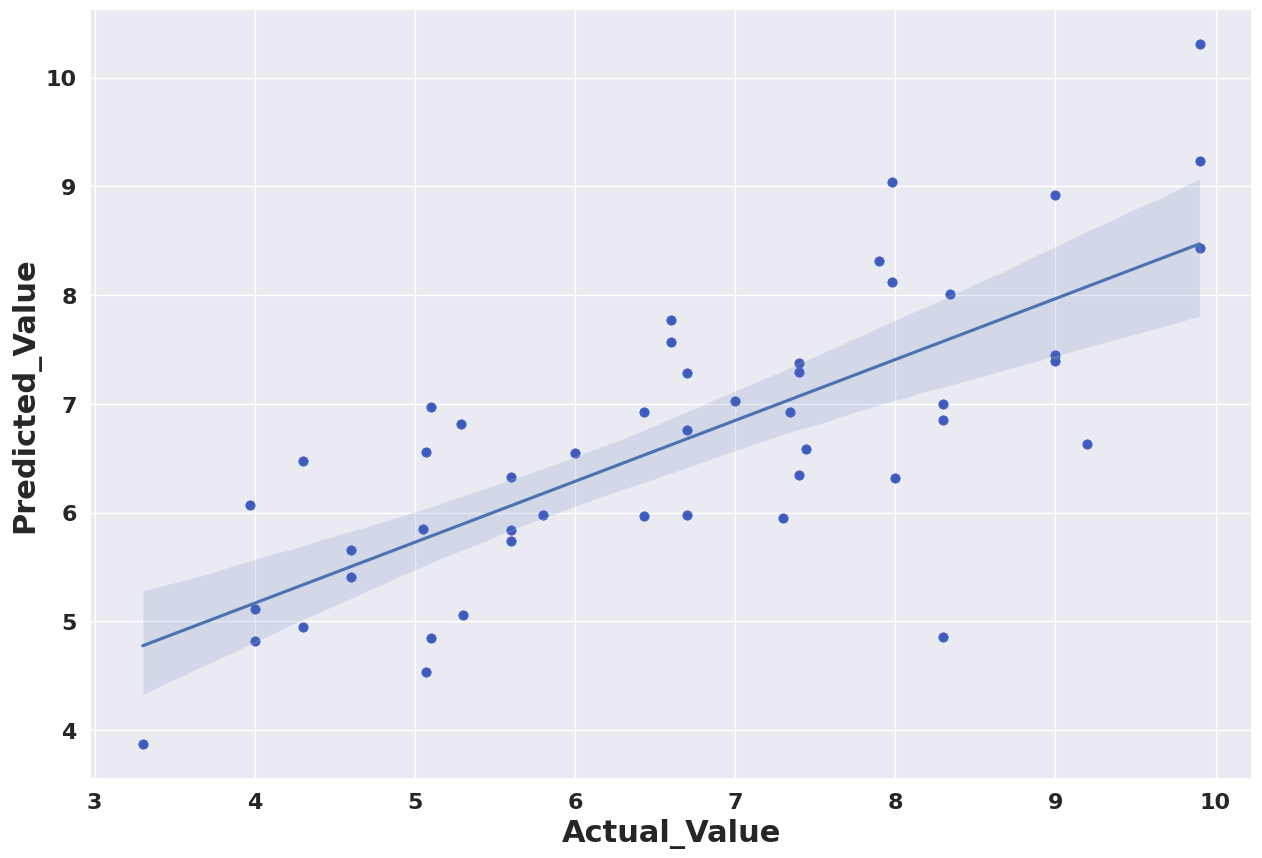

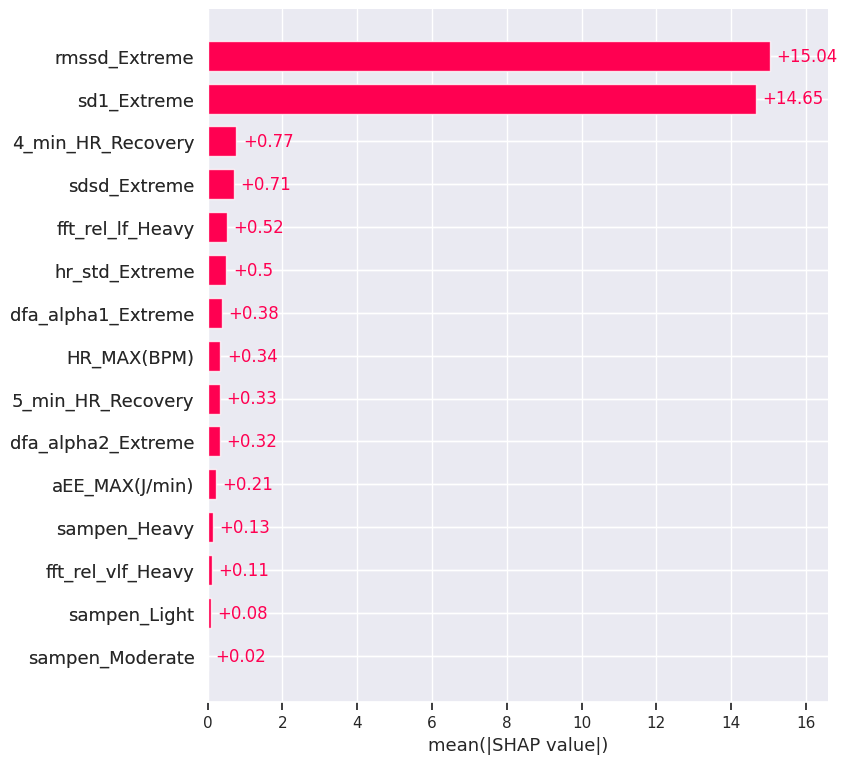

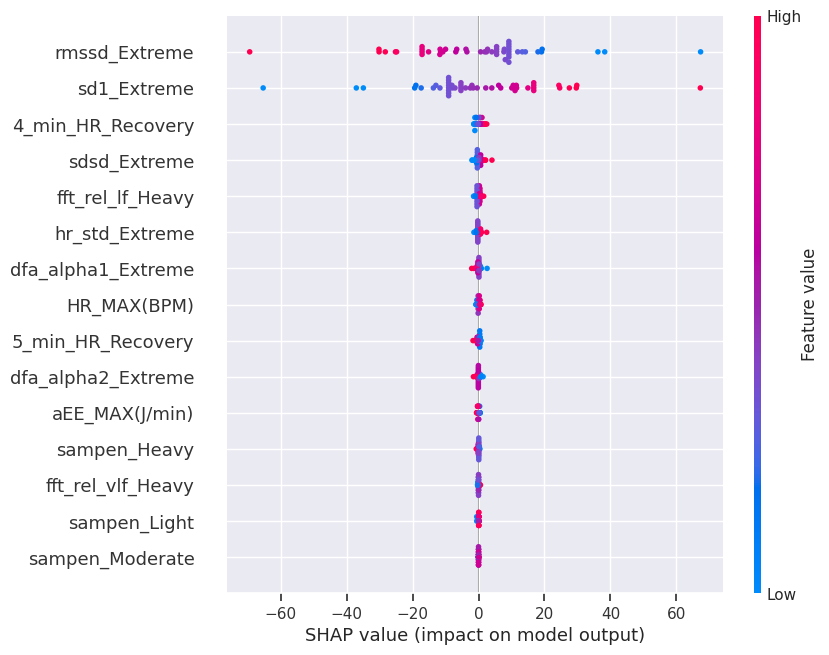

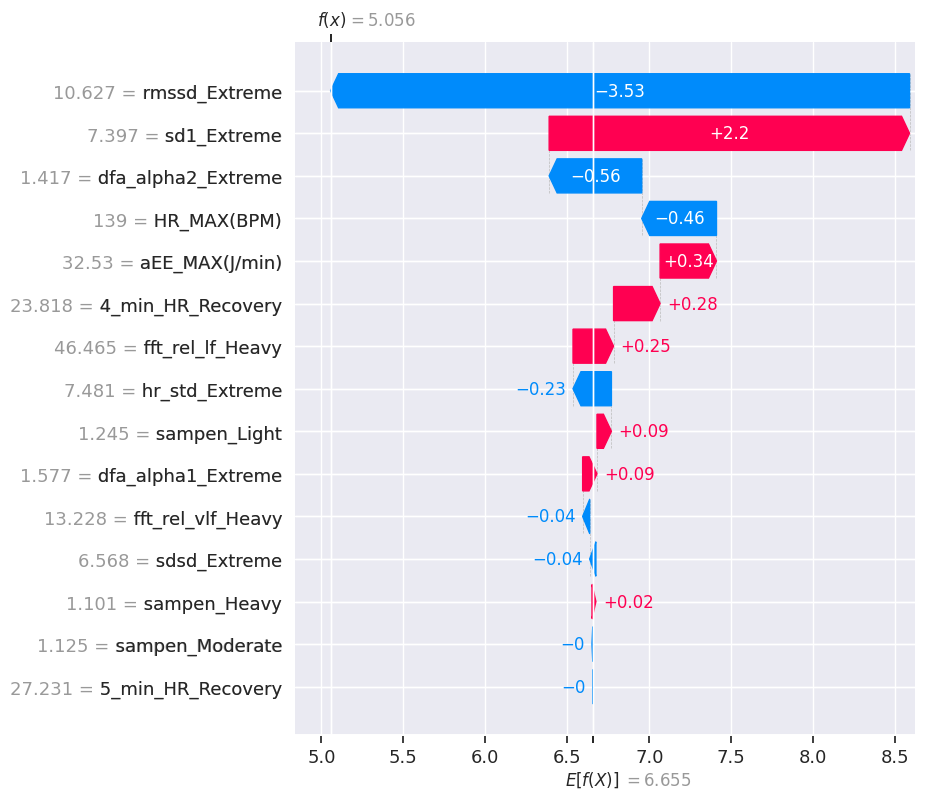

In [360]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = lin_reg.score(X_train, y_train)
print("R_sq: ",r_sq)





import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


lin_reg.fit(X_train, y_train)


explainer1 = shap.Explainer(lin_reg, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=50)
shap.plots.beeswarm(shap_values1, max_display=50)
shap.plots.waterfall(shap_values1[20], max_display=50)

#Kernel Ridge

In [361]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)


print("Training")
y_pred= krr.predict(X_train)
res(y_train,y_pred)
'''
print("Testing")
pred_test= krr.predict(X_test)
res(y_test,pred_test)

'''

Training
Mean absolute error = 1.05
Mean squared error = 1.56
Median absolute error = 0.98
Explain variance score = 0.48
R2 score = 0.48


'\nprint("Testing")\npred_test= krr.predict(X_test)\nres(y_test,pred_test)\n\n'

Testing r2:  0.48395300592827684
R_sq:  0.48395300592827684


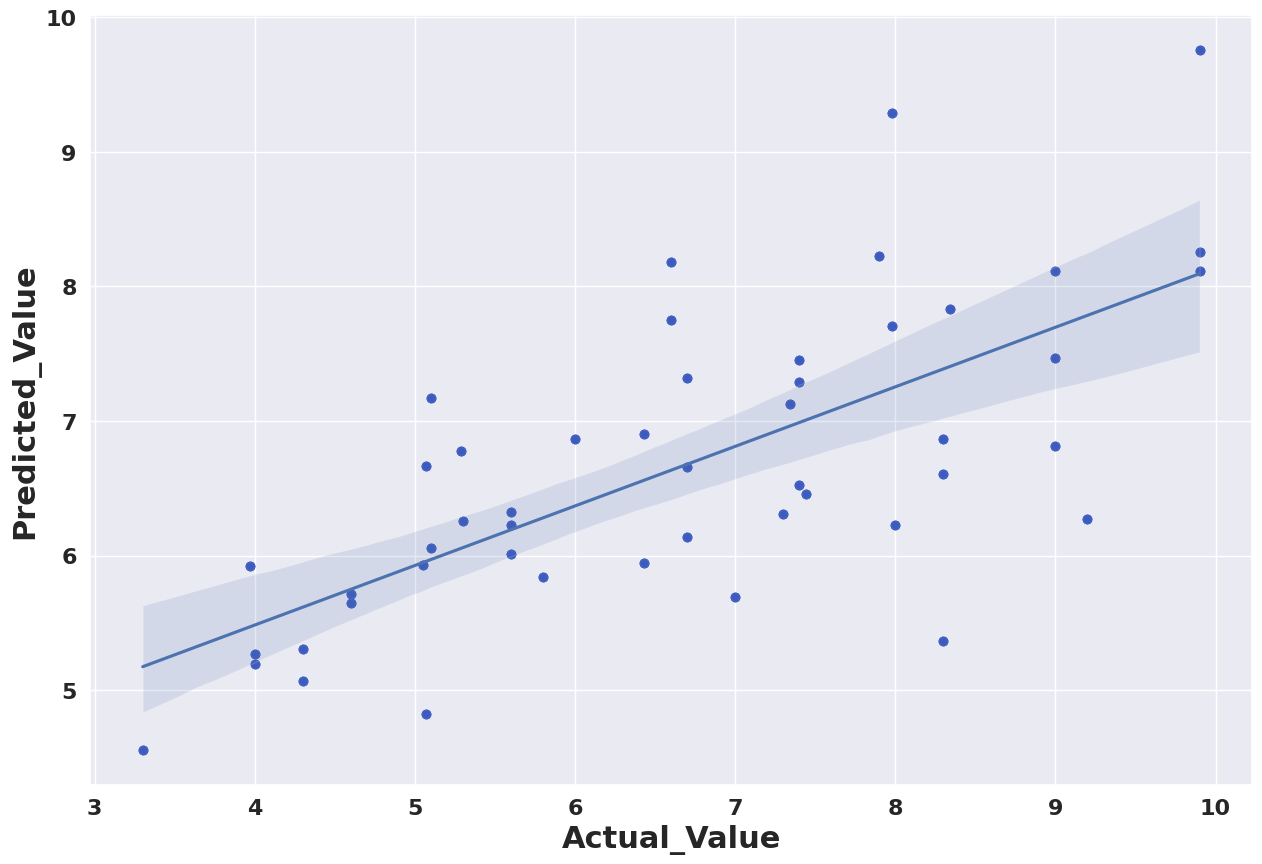

'\nexplainer1 = shap.Explainer(krr, X_train)\nshap_values1 = explainer1 (X_train)\nshap.plots.bar(shap_values1,max_display=20)\nshap.plots.beeswarm(shap_values1, max_display=20)\nshap.plots.waterfall(shap_values1[20], max_display=20)\n\n'

In [362]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = krr.score(X_train, y_train)
print("R_sq: ",r_sq)


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


krr.fit(X_train, y_train)

'''
explainer1 = shap.Explainer(krr, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=20)
shap.plots.beeswarm(shap_values1, max_display=20)
shap.plots.waterfall(shap_values1[20], max_display=20)

'''

#SVM

In [363]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svm.fit(X_train, y_train)

print("Training")
y_pred= svm.predict(X_train)
res(y_train,y_pred)
'''
print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)
'''

Training
Mean absolute error = 0.83
Mean squared error = 1.13
Median absolute error = 0.71
Explain variance score = 0.63
R2 score = 0.63


'\nprint("Testing")\npred_test= regr.predict(X_test)\nres(y_test,pred_test)\n'

Testing r2:  0.628040778359761
R_sq:  0.628040778359761


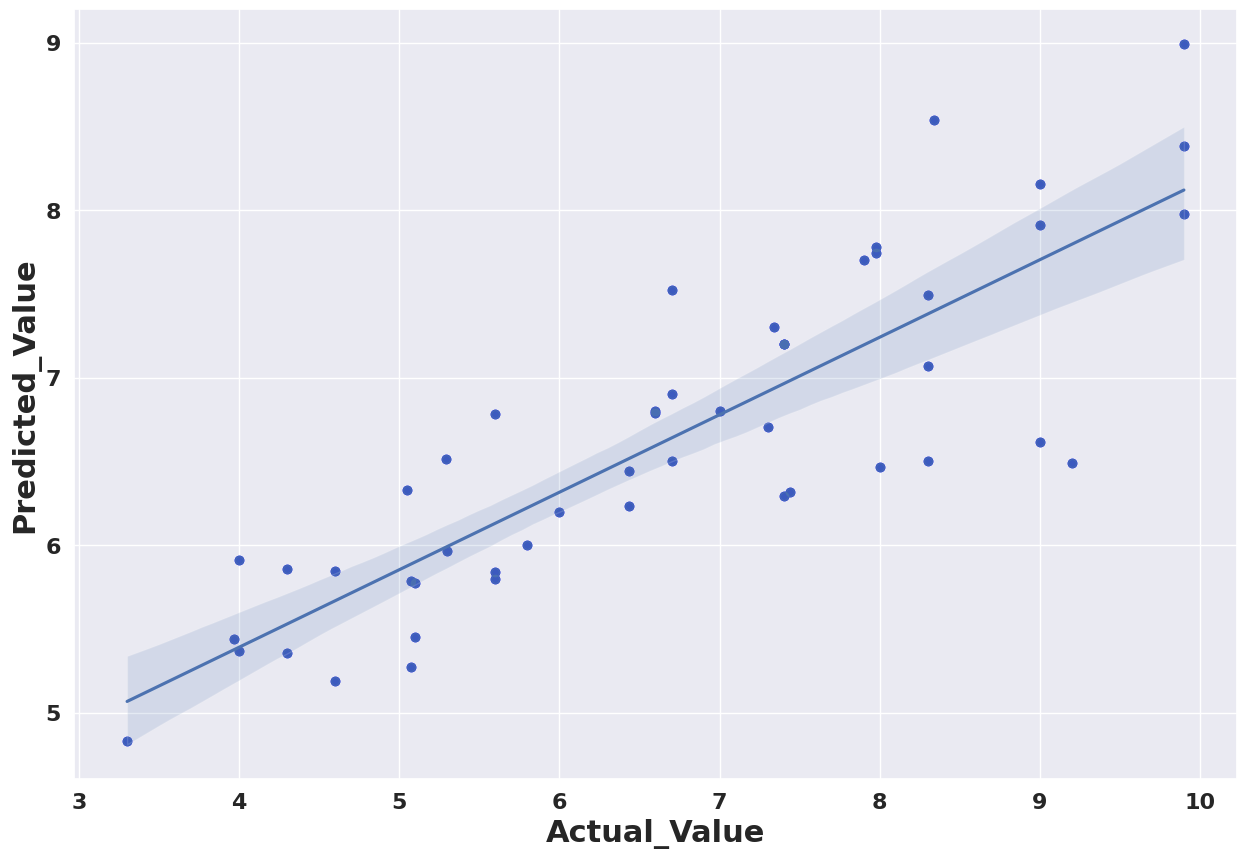

'\n\nexplainer1 = shap.Explainer(svm, X_train)\nshap_values1 = explainer1 (X_train)\nshap.plots.bar(shap_values1,max_display=20)\nshap.plots.beeswarm(shap_values1, max_display=20)\nshap.plots.waterfall(shap_values1[20], max_display=20)\n\n'

In [364]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = svm.score(X_train, y_train)
print("R_sq: ",r_sq)



import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


svm.fit(X_train, y_train)
'''

explainer1 = shap.Explainer(svm, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=20)
shap.plots.beeswarm(shap_values1, max_display=20)
shap.plots.waterfall(shap_values1[20], max_display=20)

'''


#Lasso

In [365]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.1)
las.fit(X_train, y_train)

print("Training")
y_pred= las.predict(X_train)
res(y_train,y_pred)
'''
print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)
'''

Training
Mean absolute error = 1.15
Mean squared error = 1.84
Median absolute error = 1.04
Explain variance score = 0.39
R2 score = 0.39


'\nprint("Testing")\npred_test= regr.predict(X_test)\nres(y_test,pred_test)\n'

Testing r2:  0.3916682007744795
R_sq:  0.3916682007744795


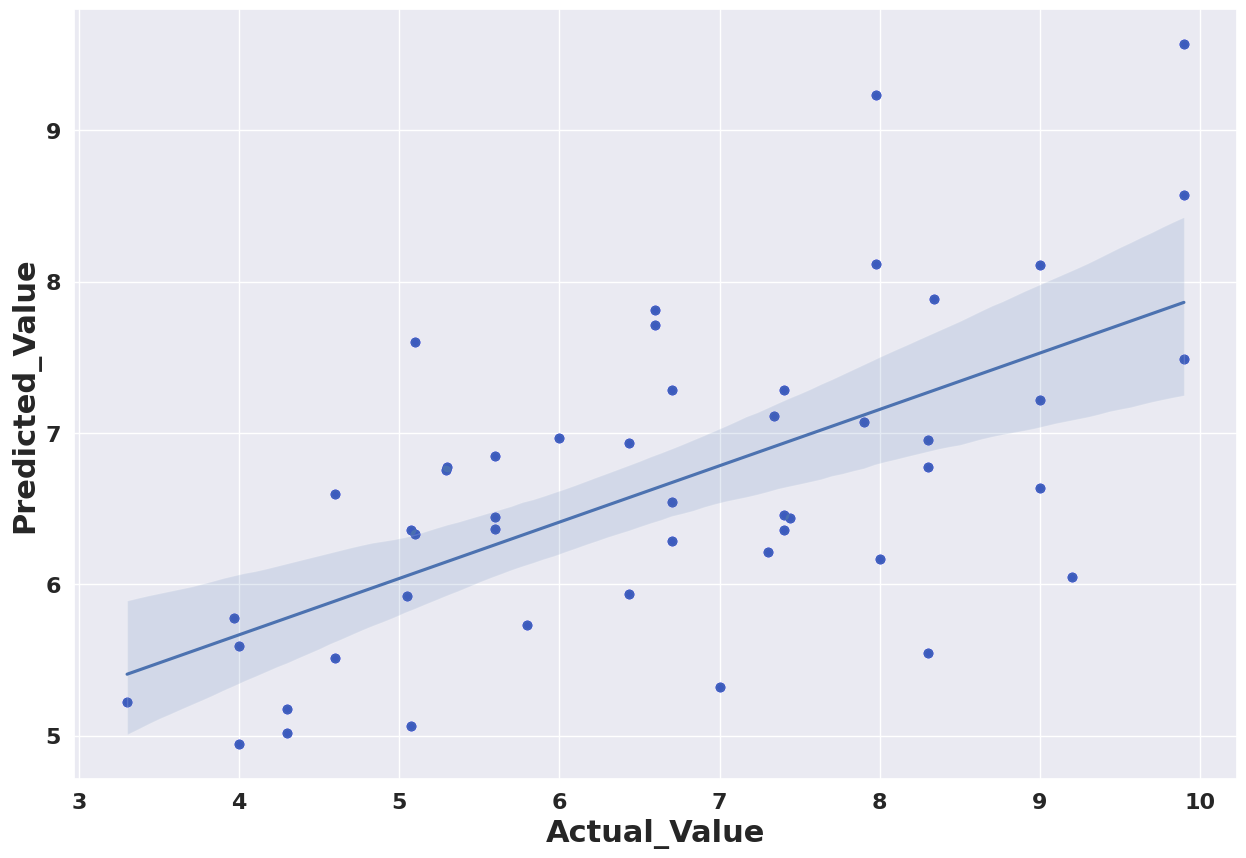

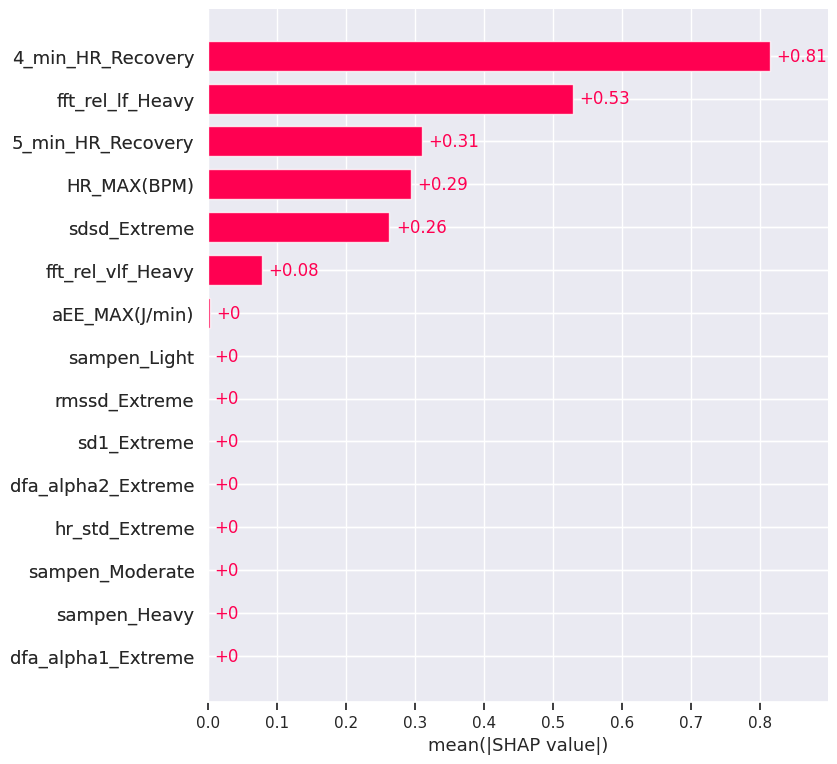

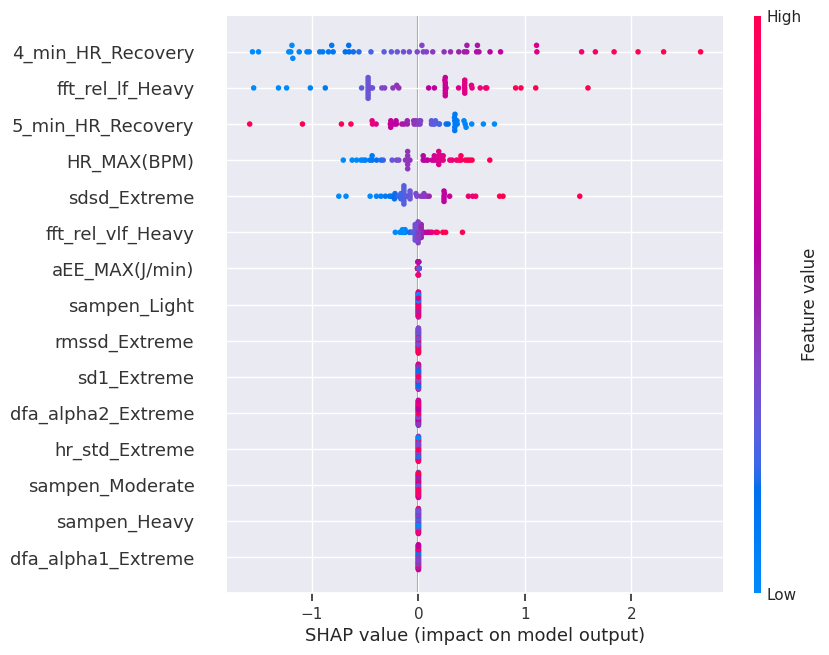

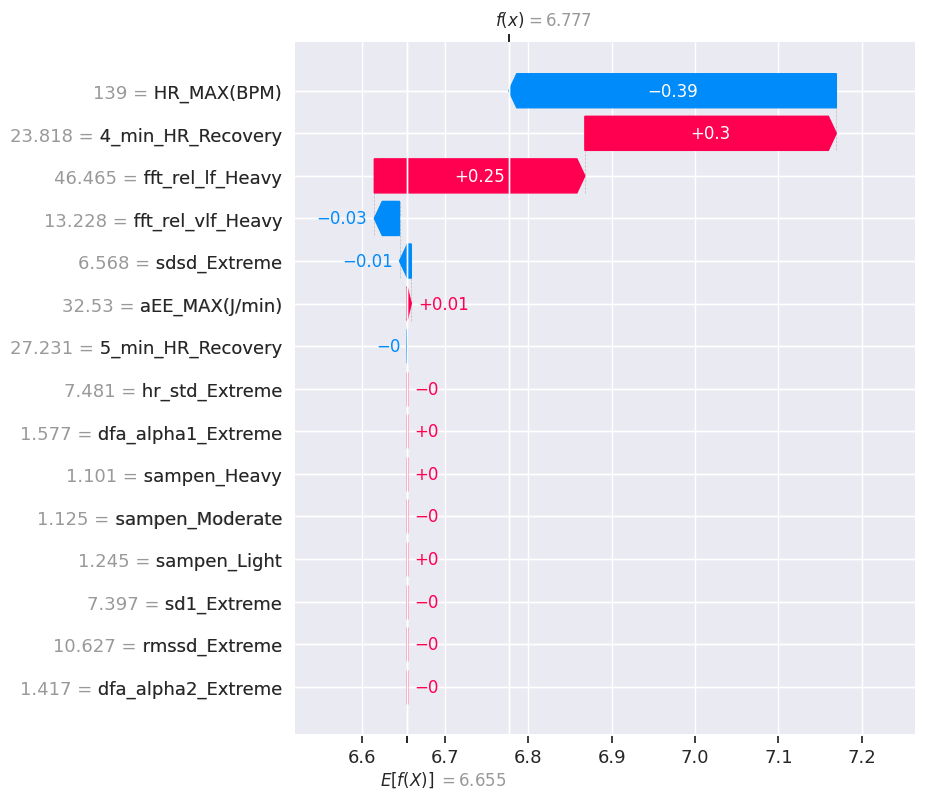

In [366]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_train,y_pred))

r_sq = las.score(X_train, y_train)
print("R_sq: ",r_sq)



import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, color = "blue")
plt.xlabel("Actual", fontsize=22, fontweight='bold')
plt.ylabel("Predicted", fontsize=22, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
plt.rc('font', size=80)
prim_plot(y_train,y_pred)
plt.show()


las.fit(X_train, y_train)


explainer1 = shap.Explainer(las, X_train)
shap_values1 = explainer1 (X_train)
shap.plots.bar(shap_values1,max_display=50)
shap.plots.beeswarm(shap_values1, max_display=50)
shap.plots.waterfall(shap_values1[20], max_display=50)

